Optimization

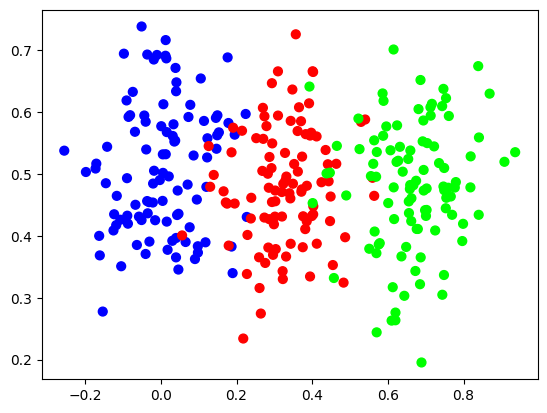

In [1]:
#SIMPLER DATASET
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import vertical_data
nnfs.init()
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

Layer Dense Class

In [2]:
import numpy as np
#Dense Layer
class Layer_Dense:
    #Layer Initialization
    def __init__(self, n_inputs, n_neurons):
        #Init wts and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

    #Forward Pass
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases


Activation ReLU

In [3]:
class Activation_ReLU:
    def forward(self,inputs):
        self.output= np.maximum(0, inputs)


Activation Softmax

In [4]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values= np.exp(inputs-np.max(inputs, axis=1, keepdims=True))
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)

        self.output=probabilities

Loss Class

In [5]:
# Common loss class
class Loss:
 # Calculates the data and regularization losses
 # given model output and ground truth values
 def calculate(self, output, y):
  # Calculate sample losses
  sample_losses = self.forward(output, y)
  # Calculate mean loss
  data_loss = np.mean(sample_losses)
  # Return loss
  return data_loss

Categorical Cross entropy loss function class - inherits loss class

In [6]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
 # Forward pass
 def forward(self, y_pred, y_true):
  # Number of samples in a batch
  samples = len(y_pred)
  # Clip data to prevent division by 0
  # Clip both sides to not drag mean towards any value
  y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
  # Probabilities for target values -
  # only if categorical labels
  if len(y_true.shape) == 1:
   correct_confidences = y_pred_clipped[
   range(samples),
   y_true
   ]
  # Mask values - only for one-hot encoded labels
  elif len(y_true.shape) == 2:
   correct_confidences = np.sum(
   y_pred_clipped*y_true,
   axis=1
   )
 # Losses
  negative_log_likelihoods = -np.log(correct_confidences)
  return negative_log_likelihoods

Strategy 1- Randomly select weights and biases (Doesn't work)

In [7]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

for iteration in range(100000):
 # Generate a new set of weights for iteration
 dense1.weights = 0.05 * np.random.randn(2, 3)
 dense1.biases = 0.05 * np.random.randn(1, 3)
 dense2.weights = 0.05 * np.random.randn(3, 3)
 dense2.biases = 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of the training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
   print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
   best_dense1_weights = dense1.weights.copy()
   best_dense1_biases = dense1.biases.copy()
   best_dense2_weights = dense2.weights.copy()
   best_dense2_biases = dense2.biases.copy()
   lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.1016203 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.1002508 acc: 0.3333333333333333
New set of weights found, iteration: 2 loss: 1.0992025 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0986239 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.0984299 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0976521 acc: 0.36333333333333334
New set of weights found, iteration: 150 loss: 1.0974255 acc: 0.3333333333333333
New set of weights found, iteration: 874 loss: 1.0972673 acc: 0.3333333333333333
New set of weights found, iteration: 894 loss: 1.096895 acc: 0.3333333333333333
New set of weights found, iteration: 1036 loss: 1.0954281 acc: 0.3333333333333333
New set of weights found, iteration: 88633 loss: 1.0952065 acc: 0.3333333333333333


Strategy 2- Randomly adjust weights and biases: Dataset- Vertical data (Works!!)

In [8]:
# Create dataset
X, y = vertical_data(samples=100, classes=3)
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
for iteration in range(10000):
 # Update weights with some small random values
 dense1.weights += 0.05 * np.random.randn(2, 3)
 dense1.biases += 0.05 * np.random.randn(1, 3)
 dense2.weights += 0.05 * np.random.randn(3, 3)
 dense2.biases += 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of our training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
  print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()
  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  lowest_loss = loss
 # Revert weights and biases
 else:
  dense1.weights = best_dense1_weights.copy()
  dense1.biases = best_dense1_biases.copy()
  dense2.weights = best_dense2_weights.copy()
  dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.1008747 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.1005715 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.099462 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.099436 acc: 0.3333333333333333
New set of weights found, iteration: 10 loss: 1.09855 acc: 0.3333333333333333
New set of weights found, iteration: 13 loss: 1.098517 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0938607 acc: 0.3333333333333333
New set of weights found, iteration: 15 loss: 1.0920315 acc: 0.3333333333333333
New set of weights found, iteration: 17 loss: 1.0913911 acc: 0.3333333333333333
New set of weights found, iteration: 19 loss: 1.0910357 acc: 0.3333333333333333
New set of weights found, iteration: 20 loss: 1.0898421 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0843327 acc: 0.3333333333333333
New set of weights found, iteration: 26 loss: 1.0

Complex Dataset: Spiral data

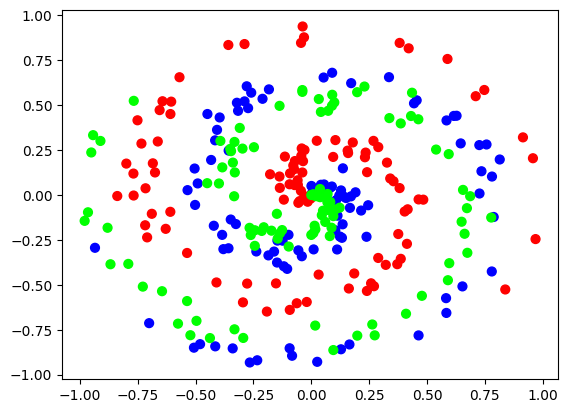

In [9]:
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

Strategy 2- Randomly adjust weights and biases: Spiral Data- doesn't work

In [10]:
# Create dataset
X, y = spiral_data(samples=100, classes=3)# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()
for iteration in range(10000):
 # Update weights with some small random values
 dense1.weights += 0.05 * np.random.randn(2, 3)
 dense1.biases += 0.05 * np.random.randn(1, 3)
 dense2.weights += 0.05 * np.random.randn(3, 3)
 dense2.biases += 0.05 * np.random.randn(1, 3)
 # Perform a forward pass of our training data through this layer
 dense1.forward(X)
 activation1.forward(dense1.output)
 dense2.forward(activation1.output)
 activation2.forward(dense2.output)
 # Perform a forward pass through activation function
 # it takes the output of second dense layer here and returns loss
 loss = loss_function.calculate(activation2.output, y)
 # Calculate accuracy from output of activation2 and targets
 # calculate values along first axis
 predictions = np.argmax(activation2.output, axis=1)
 accuracy = np.mean(predictions == y)
 # If loss is smaller - print and save weights and biases aside
 if loss < lowest_loss:
  print('New set of weights found, iteration:', iteration,'loss:', loss, 'acc:', accuracy)
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()
  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  lowest_loss = loss
 # Revert weights and biases
 else:
  dense1.weights = best_dense1_weights.copy()
  dense1.biases = best_dense1_biases.copy()
  dense2.weights = best_dense2_weights.copy()
  dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.098855 acc: 0.3333333333333333
New set of weights found, iteration: 1 loss: 1.0987207 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0985456 acc: 0.3333333333333333
New set of weights found, iteration: 19 loss: 1.0984256 acc: 0.3333333333333333
New set of weights found, iteration: 20 loss: 1.0982431 acc: 0.3333333333333333
New set of weights found, iteration: 31 loss: 1.0980144 acc: 0.38
New set of weights found, iteration: 44 loss: 1.097148 acc: 0.35333333333333333
New set of weights found, iteration: 46 loss: 1.0969592 acc: 0.35333333333333333
New set of weights found, iteration: 47 loss: 1.0968099 acc: 0.35333333333333333
New set of weights found, iteration: 57 loss: 1.0967411 acc: 0.31333333333333335
New set of weights found, iteration: 60 loss: 1.0955456 acc: 0.36
New set of weights found, iteration: 61 loss: 1.0944934 acc: 0.37333333333333335
New set of weights found, iteration: 62 loss: 1.093222 acc: 0.373333

Backpropagation to optimize weight and bias

Backpropagation on a single neuron

In [11]:
import numpy as np

# Initial parameters
weights = np.array([-3.0, -1.0, 2.0])
bias = 1.0
inputs = np.array([1.0, -2.0, 3.0])
target_output = 0.0
learning_rate = 0.001

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1.0, 0.0)

for iteration in range(200):
    # Forward pass
    linear_output = np.dot(weights, inputs) + bias
    output = relu(linear_output)
    loss = (output - target_output) ** 2

    # Backward pass
    dloss_doutput = 2 * (output - target_output) #y=(x-y)^2 d(x-y)/dx= 2(x-y) NOTE: d/dx is dow/dx which is partial derivative!!
    doutput_dlinear = relu_derivative(linear_output) #y=ReLU(x) d(ReLU(x))/dx= 1 (if x>0, 0 otherwise)
    dlinear_dweights = inputs #dMul(x,w)/dw (=x i.e inputs)
    dlinear_dbias = 1.0 #dSum(b)/db (=1)

    dloss_dlinear = dloss_doutput * doutput_dlinear #dLoss/dReLU * dReLU/dSum
    dloss_dweights = dloss_dlinear * dlinear_dweights #dLoss/dw0 or dLoss/dw1 or dLoss/dw2 = dloss_dlinear[i.e dLoss/dReLU * dReLU/dSum()] * [dSum/dMul (=1, so ignored) ]* dlinear_dweights[i.e dMul(x,w)/dw (=x i.e inputs)]
    dloss_dbias = dloss_dlinear * dlinear_dbias #dLoss/db = dloss_dlinear[i.e dLoss/dReLU * dReLU/dSum()] * dlinear_dbias[i.e dSum(b)/db (=1)]
    # Update weights and bias
    weights -= learning_rate * dloss_dweights
    bias -= learning_rate * dloss_dbias

    # Print the loss for this iteration
    print(f"Iteration {iteration + 1}, Loss: {loss}")

print("Final weights:", weights)
print("Final bias:", bias)


Iteration 1, Loss: 36.0
Iteration 2, Loss: 33.872397424621624
Iteration 3, Loss: 31.87054345809546
Iteration 4, Loss: 29.98699091998773
Iteration 5, Loss: 28.214761511794592
Iteration 6, Loss: 26.54726775906168
Iteration 7, Loss: 24.978326552541866
Iteration 8, Loss: 23.5021050739742
Iteration 9, Loss: 22.11313179151597
Iteration 10, Loss: 20.806246424284897
Iteration 11, Loss: 19.576596334671486
Iteration 12, Loss: 18.41961908608719
Iteration 13, Loss: 17.33101994032309
Iteration 14, Loss: 16.306757070164853
Iteration 15, Loss: 15.343027506224132
Iteration 16, Loss: 14.436253786815284
Iteration 17, Loss: 13.583071280700132
Iteration 18, Loss: 12.780312744165439
Iteration 19, Loss: 12.024995767388878
Iteration 20, Loss: 11.314319082257104
Iteration 21, Loss: 10.64564263994962
Iteration 22, Loss: 10.016485041642266
Iteration 23, Loss: 9.424510031713222
Iteration 24, Loss: 8.867521365009814
Iteration 25, Loss: 8.34345204094211
Iteration 26, Loss: 7.850353118483743
Iteration 27, Loss: 7.3

Back propagation through an entire layer

In [12]:
import numpy as np

# Initial inputs
inputs = np.array([1, 2, 3, 4])

# Initial weights and biases
weights = np.array([
    [0.1, 0.2, 0.3, 0.4],
    [0.5, 0.6, 0.7, 0.8],
    [0.9, 1.0, 1.1, 1.2]
])

biases = np.array([0.1, 0.2, 0.3])

# Learning rate
learning_rate = 0.001

# ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Training loop
for iteration in range(100):
    # Forward pass
    z = np.dot(weights, inputs) + biases
    a = relu(z)
    y = np.sum(a)

    # Calculate loss
    loss = y ** 2

    # Backward pass
    # Gradient of loss with respect to output y
    dL_dy = 2 * y

    # Gradient of y with respect to a
    dy_da = np.ones_like(a)

    # Gradient of loss with respect to a
    dL_da = dL_dy * dy_da

    # Gradient of a with respect to z (ReLU derivative)
    da_dz = relu_derivative(z)

    # Gradient of loss with respect to z
    dL_dz = dL_da * da_dz

    # Gradient of z with respect to weights and biases
    dL_dW = np.outer(dL_dz, inputs)
    dL_db = dL_dz

    # Update weights and biases
    weights -= learning_rate * dL_dW
    biases -= learning_rate * dL_db

    # Print the loss every 20 iterations
    if iteration % 1 == 0:
        print(f"Iteration {iteration}, Loss: {loss}")

# Final weights and biases
print("Final weights:\n", weights)
print("Final biases:\n", biases)



Iteration 0, Loss: 466.56000000000006
Iteration 1, Loss: 309.1408061254542
Iteration 2, Loss: 204.83546067662922
Iteration 3, Loss: 140.81821450601942
Iteration 4, Loss: 108.06052391356724
Iteration 5, Loss: 82.92305140514253
Iteration 6, Loss: 63.633160675090004
Iteration 7, Loss: 48.8305602695014
Iteration 8, Loss: 37.47139717735553
Iteration 9, Loss: 28.75465078555795
Iteration 10, Loss: 22.065629158959357
Iteration 11, Loss: 16.932636395893613
Iteration 12, Loss: 14.840511673308335
Iteration 13, Loss: 13.057336391187649
Iteration 14, Loss: 11.488418196254344
Iteration 15, Loss: 10.10801545931892
Iteration 16, Loss: 8.893477739126576
Iteration 17, Loss: 7.824872432374868
Iteration 18, Loss: 6.884666968331393
Iteration 19, Loss: 6.057433182939761
Iteration 20, Loss: 5.329595763793193
Iteration 21, Loss: 4.689212990460128
Iteration 22, Loss: 4.125776513653082
Iteration 23, Loss: 3.630039626837757
Iteration 24, Loss: 3.193868551928063
Iteration 25, Loss: 2.8101060412434578
Iteration 26

Backpropagation through multiple layers

It needs to find gradient of loss w r t weights, biases and also inputs of each layer while backpropagating to ultimately find the best initial weights and biases

Backpropagation w r t weights

In [13]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.], #dl_dz
 [2., 2., 2.],
 [3., 3., 3.]])
# We have 3 sets of inputs - samples
inputs = np.array([[1, 2, 3, 2.5],
 [2., 5., -1., 2],
 [-1.5, 2.7, 3.3, -0.8]])
# sum weights of given input
# and multiply by the passed-in gradient for this neuron
dweights = np.dot(inputs.T, dvalues) #dl_dW= X.T*dl_dZ
print(dweights)

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


Gradients of loss w r t Biases

In [14]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
 [2., 2., 2.],
 [3., 3., 3.]])
# One bias for each neuron
# biases are the row vector with a shape (1, neurons)
biases = np.array([[2, 3, 0.5]])
# dbiases - sum values, do this over samples (first axis), keepdims
# since this by default will produce a plain list -
# we explained this in the chapter 4
dbiases = np.sum(dvalues, axis=0, keepdims=True)  #sum of the cols
print(dbiases)

[[6. 6. 6.]]


Gradients of Loss w r t inputs

In [15]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.], #dl_dz
 [2., 2., 2.],
 [3., 3., 3.]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
 [0.5, -0.91, 0.26, -0.5],
 [-0.26, -0.27, 0.17, 0.87]]).T
# sum weights of given input
# and multiply by the passed-in gradient for this neuron
dinputs = np.dot(dvalues, weights.T)  #dl_dx= dl_dz*W.T
print(dinputs)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


Adding backward method using these formulas in LayerDense Class

In [16]:
# class Layer_Dense:
#  ...
#  # Backward pass
#  def backward(self, dvalues):
#  # Gradients on parameters
#  self.dweights = np.dot(self.inputs.T, dvalues)
#  self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
#  # Gradient on values
#  self.dinputs = np.dot(dvalues, self.weights.T)

In [ ]:
# # ReLU activation
# class Activation_ReLU:
#  # Forward pass
#  def forward(self, inputs):
#  # Remember input values
#  self.inputs = inputs
#  self.output = np.maximum(0, inputs)
#  # Backward pass
#  def backward(self, dvalues):
#  # Since we need to modify the original variable,
#  # let's make a copy of the values first
#  self.dinputs = dvalues.copy()
#  # Zero gradient where input values were negative
#  self.dinputs[self.inputs <= 0] = 0